<a href="https://colab.research.google.com/github/kushagrasharma-13/Python/blob/main/PCA_with_2_Principal_Components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

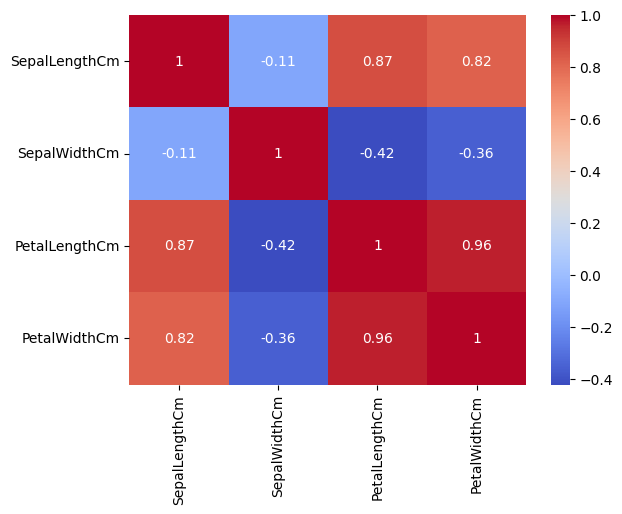

In [8]:
corr = x.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=20, stratify=y)

In [10]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(x_train, y_train)
print("Train score before PCA",knn_pca.score(x_train, y_train),"%")
print("Test score before PCA",knn_pca.score(x_test, y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


In [11]:
pca = PCA(n_components=2)
x = pca.fit_transform(x)

In [12]:
pca.get_covariance()

array([[ 0.67919741, -0.03258618,  1.27066452,  0.5321852 ],
       [-0.03258618,  0.18113034, -0.31863564, -0.13363564],
       [ 1.27066452, -0.31863564,  3.11934547,  1.28541527],
       [ 0.5321852 , -0.13363564,  1.28541527,  0.58961806]])

In [13]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557])

In [14]:
x_train_new, x_test_new, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=20, stratify=y)

In [15]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(x_train_new,y_train)
print("Train score after PCA",knn_pca.score(x_train_new, y_train),"%")
print("Test score after PCA",knn_pca.score(x_test_new, y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9333333333333333 %
